In [20]:
#!pip install librosa ffmpeg matplotlib

In [21]:
from sklearn.cluster import KMeans
from scipy import signal, fft
import numpy as np

In [22]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [23]:
ls

AudioSearch.ipynb           requirements.txt
README.md                   samples/
analise_exploratoria.ipynb


In [24]:
# !ffmpeg -i 8701320 8701320.wav -y

In [45]:
intro_x, intro_sr = librosa.load('./samples/8701320.wav', sr=44100)
intro_len = len(intro_x)

In [46]:
similarities = signal.fftconvolve(episode_x, intro_x, mode='same')

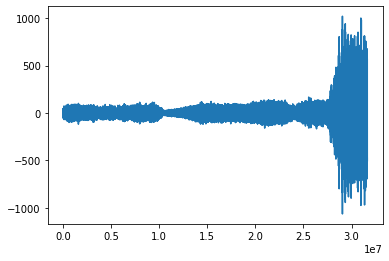

In [47]:
plt.plot(similarities)

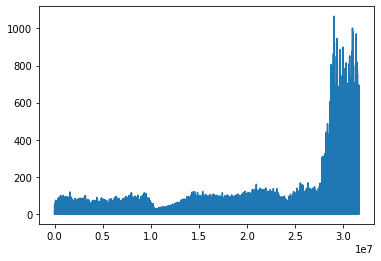

In [48]:
positive_similarities = abs(similarities)
plt.plot(positive_similarities)
del similarities

In [49]:
pulse = signal.hann(intro_len) #np.ones(len(intro_x))
filtered_signal = signal.convolve(positive_similarities, pulse, mode='same')

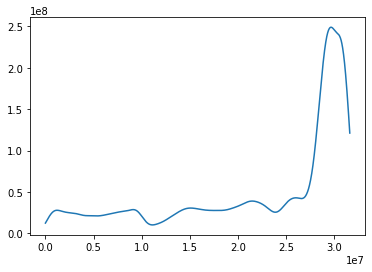

In [50]:
plt.plot(filtered_signal)

In [51]:
kmeans = KMeans(n_clusters=2, random_state=0) \
    .fit(filtered_signal.reshape(-1,1))

In [52]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

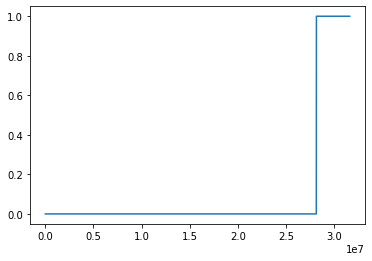

In [53]:
plt.plot(kmeans.labels_)

# FFT

In [54]:
def convert_fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1 / sampling_rate
    yf = fft.fft(audio)
    a = 1.0/(2.0*T)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)

    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency")
    plt.ylabel('Magnitude')
    return plt.show()

def fft_plot(fft_audio, sampling_rate):
    n = len(fft_audio)
    T = 1 / sampling_rate
    yf = fft_audio
    a = 1.0/(2.0*T)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)

    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency")
    plt.ylabel('Magnitude')
    return plt.show()

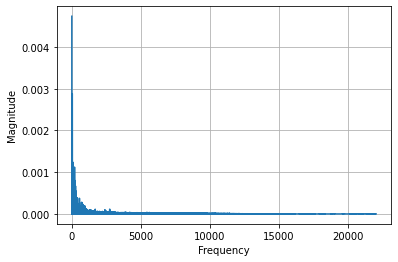

In [55]:
convert_fft_plot(episode_x, episode_sr)

In [56]:
fft_episode = fft.fft(episode_x)
fft_intro = fft.fft(intro_x)

In [57]:
fft_difference = signal.convolve(fft_episode, fft_intro, mode='same')

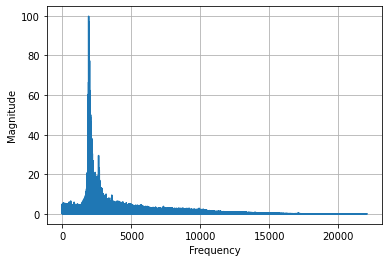

In [58]:
fft_plot(fft_difference,episode_sr)

In [59]:
pulse = fft.fft(signal.hann(intro_len))
filtered_fft = signal.convolve(fft_difference, pulse, mode='same')

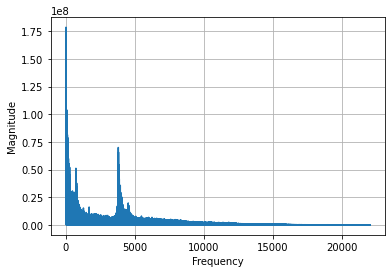

In [60]:
fft_plot(filtered_fft, episode_sr)

In [61]:
del filtered_fft, pulse, fft_difference

###  Compare Spectral Signals

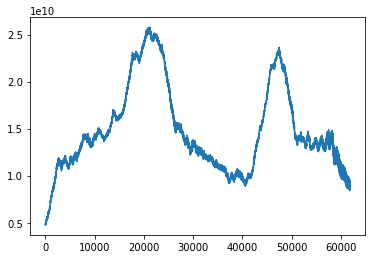

In [70]:
cent_episode = librosa.feature.spectral_centroid(y=episode_x, sr=44100)
cent_intro = librosa.feature.spectral_centroid(y=intro_x, sr=44100)
filtered_signal = signal.convolve(cent_episode[0], cent_intro[0], mode='same')
plt.plot(filtered_signal)
plt.show()

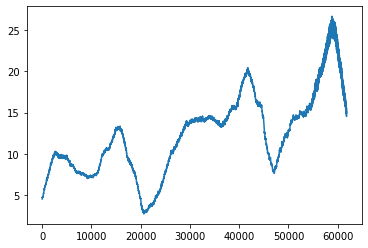

In [71]:
rms_episode = librosa.feature.rms(y=episode_x)
rms_intro = librosa.feature.rms(y=intro_x)
filtered_signal = signal.convolve(rms_episode[0], rms_intro[0], mode='same')
plt.plot(filtered_signal)
plt.show()

### Compare Zero Crossing Rate

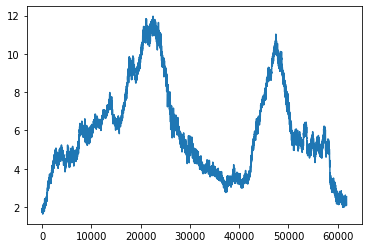

In [79]:
zero_episode = librosa.feature.zero_crossing_rate(y=episode_x)
zero_intro = librosa.feature.zero_crossing_rate(y=intro_x)
filtered_signal = signal.convolve(zero_episode[0], zero_intro[0], mode='same')
plt.plot(filtered_signal)
plt.show()

###  Spectral Roll Off

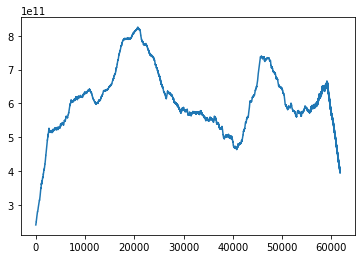

In [82]:
rolloff_max_episode = librosa.feature.spectral_rolloff(y=episode_x, sr=44100, roll_percent=0.99)
rolloff_max_intro = librosa.feature.spectral_rolloff(y=intro_x, sr=44100, roll_percent=0.99)
filtered_signal = signal.convolve(rolloff_max_episode[0], rolloff_max_intro[0], mode='same')
plt.plot(filtered_signal)
plt.show()

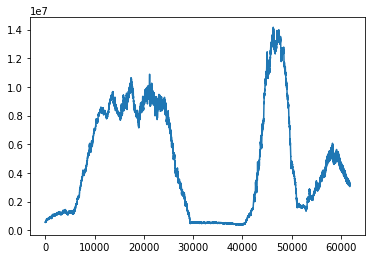

In [85]:
rolloff_min_episode = librosa.feature.spectral_rolloff(y=episode_x, sr=44100, roll_percent=0.01)
rolloff_min_intro = librosa.feature.spectral_rolloff(y=intro_x, sr=44100, roll_percent=0.01)
filtered_signal = signal.convolve(rolloff_min_episode[0], rolloff_min_intro[0], mode='same')
plt.plot(filtered_signal)
plt.show()

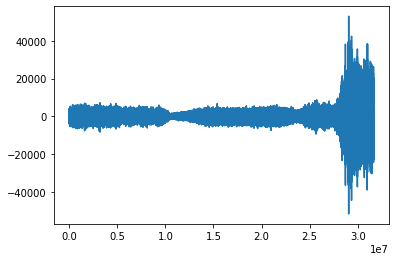

In [100]:
mu_compress_episode = librosa.mu_compress(episode_x, quantize=False)
mu_compress_intro = librosa.mu_compress(intro_x, quantize=False)
filtered_signal = signal.convolve(mu_compress_episode, mu_compress_intro, mode='same')
plt.plot(filtered_signal)
plt.show()

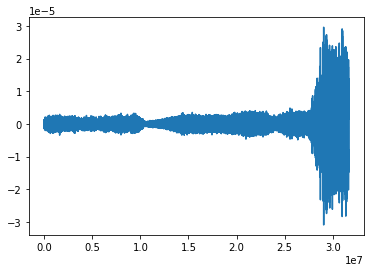

In [114]:
mu_expand_episode = librosa.mu_expand(episode_x , quantize=True)
mu_expand_intro = librosa.mu_expand(intro_x,  quantize=True)
filtered_signal = signal.convolve(mu_expand_episode, mu_expand_intro, mode='same')
plt.plot(filtered_signal)
plt.show()

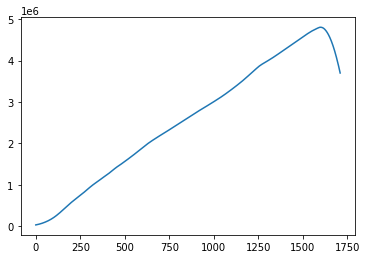

In [111]:
onset_episode = librosa.onset.onset_detect(y=episode_x, sr=44100, units='time')
onset_intro = librosa.onset.onset_detect(y=intro_x, sr=44100, units='time')
filtered_signal = signal.convolve(onset_episode, onset_intro, mode='same')
plt.plot(filtered_signal)
plt.show()
